<a href="https://colab.research.google.com/github/Aditya260698/Adv-Database/blob/main/AdvDSEMUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Generative AI:
Generative AI refers to a subset of artificial intelligence techniques focused on generating new content, data, or instances that resemble a given dataset. Rather than being explicitly programmed, these models learn patterns and structures from existing data and generate new, similar data. Generative AI is especially prevalent in tasks where creating new data samples is valuable.


#Applications in Data Science:

##Image Generation:
Generative AI, such as GANs, is widely used to create realistic images. This is applied in various domains, from art and design to generating synthetic datasets for training computer vision models.
Data Augmentation: In machine learning, generative techniques are employed to augment datasets. This helps in training more robust models by providing a diverse range of examples.
##Anomaly Detection:
Generative models can learn the normal distribution of data and identify anomalies or outliers by detecting data points that deviate significantly from the learned patterns.
#Relevance of Data Generation:
Data generation is crucial in various data science tasks due to:

###Data Scarcity:
In many real-world scenarios, obtaining a large labeled dataset is challenging. Generative models help overcome this limitation by creating synthetic data to augment existing sets.
###Creating Diverse Datasets:
A diverse dataset is essential for training models that generalize well to different scenarios. Data generation introduces variety, improving model robustness.
###Privacy Preservation:
Generative models can generate synthetic data that retains the statistical properties of the original data, enabling analysis without exposing sensitive information.
###Theoretical Underpinnings:
Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs):

##GANs:
 GANs consist of a generator and a discriminator. The generator creates synthetic data, and the discriminator tries to distinguish between real and generated data. The adversarial training process leads to the generation of realistic data.

##VAEs:
VAEs are probabilistic models that encode input data into a latent space. Unlike GANs, VAEs are concerned with the probability distribution of the data, allowing for more controlled generation.


#Contributions to Data Science:
##Generative AI contributes to data science in several ways:

###Data Augmentation:
Enhances the size and diversity of training datasets, improving model generalization.
###Addressing Imbalance:
Generates synthetic samples for under-represented classes, addressing class imbalance issues in classification tasks.
###Privacy-Preserving Analysis:
Allows analysis on sensitive data without exposing individual details by generating privacy-preserving synthetic datasets.
Generative AI methods, by their ability to create new data instances, play a pivotal role in overcoming challenges and enhancing the capabilities of data science models.

##**In this project we will be using GANs to study the Fashion MNIST Dataset and train the model**

#Generative Adversarial Networks (GANs):

####Generative Adversarial Networks (GANs) are a class of generative models introduced by Ian Goodfellow and his colleagues in 2014. GANs consist of two primary components: a generator and a discriminator, which are neural networks trained simultaneously through adversarial training.

##Purpose in Data Generation:

####The primary purpose of GANs in data generation is to create synthetic data that closely resembles a given dataset. The generator generates new instances, such as images, based on random noise, and the discriminator evaluates these generated samples against real samples. The continuous adversarial interplay between the generator and discriminator results in the generation of increasingly realistic data.


#Key Features:

##Adversarial Training:
####GANs employ a competitive process where the generator tries to produce data that is indistinguishable from real data, and the discriminator aims to correctly classify whether a given sample is real or generated.

##Versatility:
####GANs are versatile and applicable to various domains, including image synthesis, style transfer, and data augmentation.

#Significance in Data Science:

##Data Augmentation:
####GANs are widely used to augment datasets, providing additional diverse examples for training machine learning models.

##Image Synthesis:
#####GANs excel in generating realistic images, which is valuable in fields such as computer vision and graphics.

#Considerations:

##Mode Collapse:
####GANs may suffer from mode collapse, where the generator focuses on a limited set of samples, reducing diversity.

##Training Stability:
####Achieving stable training in GANs can be challenging and may require careful tuning of hyperparameters.

####Understanding GANs and their application in data generation is crucial for leveraging their potential in various data science tasks. This overview sets the stage for exploring the practical aspects of implementing GANs for data generation in the subsequent steps of your assignment.

# **Use Case:**
##Generate synthetic fashion items with variations or explore data augmentation for fashion recognition tasks

###Let's deep dive into using the Fashion MNIST dataset for your assignment. We'll use a Generative Adversarial Network (GAN) to generate synthetic images. In this example, I'll guide you through the process using TensorFlow and Keras in a Google Colab environment.

In [4]:
# Install TensorFlow (replace version with the desired version)
!pip install tensorflow

# Install Matplotlib for plotting
!pip install matplotlib



#Step 1: Load and Explore the Fashion MNIST Dataset

4422102/4422102 [==============================] - 0s 0us/step


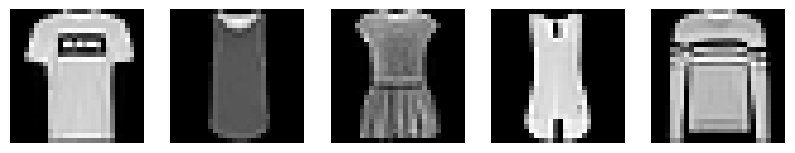

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0

# Display a few sample images
plt.figure(figsize=(10, 2))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()



*   **We import necessary libraries, including TensorFlow, Keras, Matplotlib, and NumPy.**

*   **The Fashion MNIST dataset is loaded using tf.keras.datasets.fashion_mnist.load_data().**

*   **Pixel values of images are normalized to be in the range [0, 1].**
*   **We display a few sample images to get an initial look at the dataset.**






#Step 2: Define the Generator and Discriminator Models

In [6]:
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(7 * 7 * 256, input_dim=latent_dim))
    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='sigmoid'))
    return model

def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the dimensions of the random noise vector (latent space)
latent_dim = 100

# Build the generator and discriminator
generator = build_generator(latent_dim)
discriminator = build_discriminator((28, 28, 1))




*   **We define functions build_generator and build_discriminator to create the generator and discriminator models.**
*   **The generator takes random noise as input and transforms it into a 28x28 grayscale image.**
*   **The discriminator is a binary classifier that distinguishes between real and generated images.**
*   **Both models are defined using Sequential models from Keras.**


#Step 3: Compile the Models

In [7]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combine the generator and discriminator into a GAN model
discriminator.trainable = False  # Set discriminator weights as non-trainable
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


*   **The discriminator is compiled using binary cross-entropy loss and the Adam optimizer.**
*   **We create a GAN model by combining the generator and discriminator. During GAN training, only the generator is updated.**
*   **We set the discriminator's weights as non-trainable during GAN training.**


#Step 4: Train the GAN

4/4 [==============================] - 0s 3ms/step
Epoch 1/50, Discriminator Loss: 0.08413643017411232, Generator Loss: 1.750293493270874
4/4 [==============================] - 0s 3ms/step
Epoch 2/50, Discriminator Loss: 0.6248388290405273, Generator Loss: 1.5051844120025635
4/4 [==============================] - 0s 3ms/step
Epoch 3/50, Discriminator Loss: 0.4741886854171753, Generator Loss: 1.532088041305542
4/4 [==============================] - 0s 3ms/step
Epoch 4/50, Discriminator Loss: 0.6948005855083466, Generator Loss: 1.2483121156692505
4/4 [==============================] - 0s 5ms/step
Epoch 5/50, Discriminator Loss: 0.43070460855960846, Generator Loss: 1.660492181777954
4/4 [==============================] - 0s 7ms/step
Epoch 6/50, Discriminator Loss: 0.19699139147996902, Generator Loss: 2.2786545753479004
4/4 [==============================] - 0s 2ms/step
Epoch 7/50, Discriminator Loss: 0.3459109514951706, Generator Loss: 1.6334048509597778
4/4 [=============================

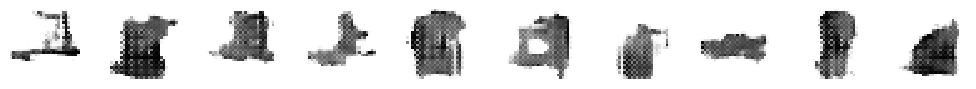

4/4 [==============================] - 0s 5ms/step
Epoch 11/50, Discriminator Loss: 0.47622808814048767, Generator Loss: 1.7616389989852905
4/4 [==============================] - 0s 5ms/step
Epoch 12/50, Discriminator Loss: 0.28905627131462097, Generator Loss: 1.9906480312347412
4/4 [==============================] - 0s 7ms/step
Epoch 13/50, Discriminator Loss: 0.37891924381256104, Generator Loss: 1.9660370349884033
4/4 [==============================] - 0s 6ms/step
Epoch 14/50, Discriminator Loss: 0.34267622232437134, Generator Loss: 1.9066352844238281
4/4 [==============================] - 0s 4ms/step
Epoch 15/50, Discriminator Loss: 0.3870442807674408, Generator Loss: 1.5467196702957153
4/4 [==============================] - 0s 7ms/step
Epoch 16/50, Discriminator Loss: 0.36163894832134247, Generator Loss: 1.6443032026290894
4/4 [==============================] - 0s 4ms/step
Epoch 17/50, Discriminator Loss: 0.35043489933013916, Generator Loss: 1.5746397972106934
4/4 [================

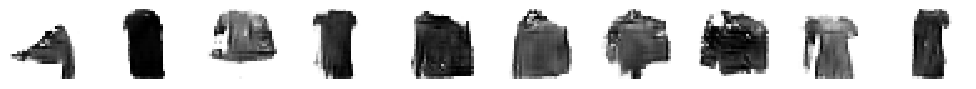

4/4 [==============================] - 0s 5ms/step
Epoch 21/50, Discriminator Loss: 0.43020638823509216, Generator Loss: 1.187056064605713
4/4 [==============================] - 0s 6ms/step
Epoch 22/50, Discriminator Loss: 0.4195246249437332, Generator Loss: 1.5114175081253052
4/4 [==============================] - 0s 3ms/step
Epoch 23/50, Discriminator Loss: 0.37530556321144104, Generator Loss: 1.4045230150222778
4/4 [==============================] - 0s 5ms/step
Epoch 24/50, Discriminator Loss: 0.38373205065727234, Generator Loss: 1.4425640106201172
4/4 [==============================] - 0s 4ms/step
Epoch 25/50, Discriminator Loss: 0.343911811709404, Generator Loss: 2.021358013153076
4/4 [==============================] - 0s 6ms/step
Epoch 26/50, Discriminator Loss: 0.41336557269096375, Generator Loss: 1.5964206457138062
4/4 [==============================] - 0s 5ms/step
Epoch 27/50, Discriminator Loss: 0.47837258875370026, Generator Loss: 1.481230616569519
4/4 [=====================

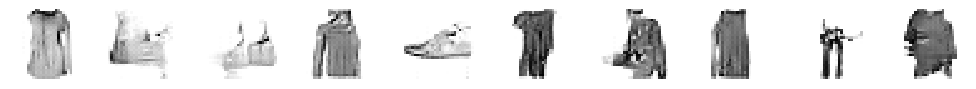

4/4 [==============================] - 0s 6ms/step
Epoch 31/50, Discriminator Loss: 0.3949127048254013, Generator Loss: 1.796715259552002
4/4 [==============================] - 0s 7ms/step
Epoch 32/50, Discriminator Loss: 0.48442067205905914, Generator Loss: 1.588787317276001
4/4 [==============================] - 0s 5ms/step
Epoch 33/50, Discriminator Loss: 0.32077208161354065, Generator Loss: 2.012967824935913
4/4 [==============================] - 0s 4ms/step
Epoch 34/50, Discriminator Loss: 0.4476338177919388, Generator Loss: 1.3501436710357666
4/4 [==============================] - 0s 5ms/step
Epoch 35/50, Discriminator Loss: 0.3362920433282852, Generator Loss: 0.9588297605514526
4/4 [==============================] - 0s 5ms/step
Epoch 36/50, Discriminator Loss: 0.20677445083856583, Generator Loss: 1.166405439376831
4/4 [==============================] - 0s 4ms/step
Epoch 37/50, Discriminator Loss: 0.3275957703590393, Generator Loss: 2.1064066886901855
4/4 [=======================

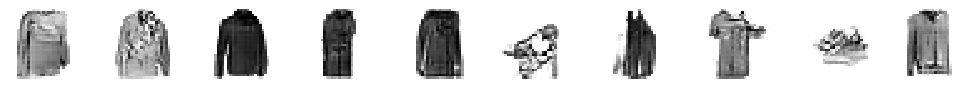

4/4 [==============================] - 0s 5ms/step
Epoch 41/50, Discriminator Loss: 0.302792489528656, Generator Loss: 2.065089225769043
4/4 [==============================] - 0s 7ms/step
Epoch 42/50, Discriminator Loss: 0.4437687247991562, Generator Loss: 1.7949070930480957
4/4 [==============================] - 0s 5ms/step
Epoch 43/50, Discriminator Loss: 0.34338921308517456, Generator Loss: 1.8335039615631104
4/4 [==============================] - 0s 4ms/step
Epoch 44/50, Discriminator Loss: 0.43375688791275024, Generator Loss: 1.7545974254608154
4/4 [==============================] - 0s 5ms/step
Epoch 45/50, Discriminator Loss: 0.4680143892765045, Generator Loss: 1.3075392246246338
4/4 [==============================] - 0s 4ms/step
Epoch 46/50, Discriminator Loss: 0.3614504039287567, Generator Loss: 2.000178813934326
4/4 [==============================] - 0s 9ms/step
Epoch 47/50, Discriminator Loss: 0.4853150546550751, Generator Loss: 1.8904750347137451
4/4 [=======================

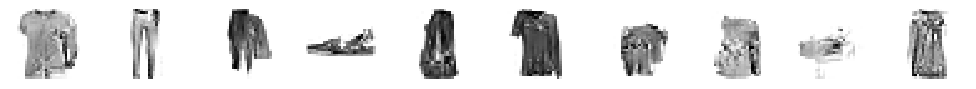

In [8]:
def train_gan(epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        for _ in range(x_train.shape[0] // batch_size):
            noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
            generated_imgs = generator.predict(noise)
            real_imgs = x_train[np.random.randint(0, x_train.shape[0], batch_size)]

            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_imgs, labels_real)
            d_loss_fake = discriminator.train_on_batch(generated_imgs, labels_fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train the generator
            noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
            labels_gen = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, labels_gen)

        print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

        if (epoch + 1) % 10 == 0:
            # Save generated images
            save_generated_images(epoch + 1, generator, latent_dim)

def save_generated_images(epoch, generator, latent_dim, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=(examples, latent_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = 0.5 * generated_imgs + 0.5  # Rescale pixel values to [0, 1]

    plt.figure(figsize=figsize)
    for i in range(generated_imgs.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_imgs[i, :, :, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.show()

# Set the number of epochs and batch size
epochs = 50
batch_size = 128

# Train the GAN
train_gan(epochs, batch_size, latent_dim)



*   **The train_gan function trains the GAN model over a specified number of epochs.**
*   **For each epoch, it iterates through batches of real and generated images, updating the discriminator and generator.**
*   **The discriminator is trained to distinguish between real and generated images, and the generator is trained to fool the discriminator.**
*   **The generator aims to generate images that are indistinguishable from real images.**
*   **The save_generated_images function is called every 10 epochs to visualize the generated images and save them.**

In [9]:
gan.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#After The model trained successfully I have Saved the model
### Now we can use to model to perform various tasks like:


1.   Visualize Generated Images:
2.   Evaluate Model Performance:
3.   Generate New Samples:



#Visualize Generated Images

Here we use the save_generated_images function to visualize and save some of the generated images.

This code will generate and display 10 images and save them in a file named gan_generated_image_epoch_{epoch}.png.

1/1 [==============================] - 0s 28ms/step


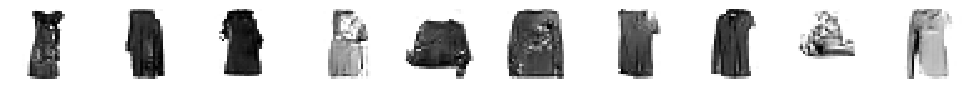

In [10]:
# Visualize and save generated images
save_generated_images(epochs, generator, latent_dim, examples=10, dim=(1, 10), figsize=(10, 1))


1/1 [==============================] - 0s 28ms/step


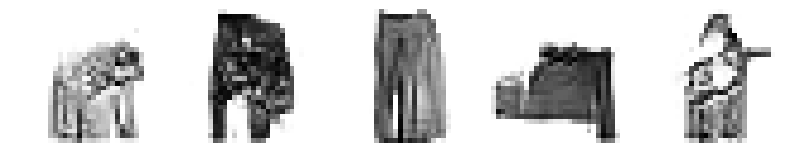

In [12]:
# Generate images using the trained generator
noise_for_visualization = np.random.normal(0, 1, size=(10, latent_dim))
generated_imgs = generator.predict(noise_for_visualization)
generated_imgs = 0.5 * generated_imgs + 0.5  # Rescale pixel values to [0, 1]

# Visualize the generated images
plt.figure(figsize=(10, 2))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(generated_imgs[i, :, :, 0], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()


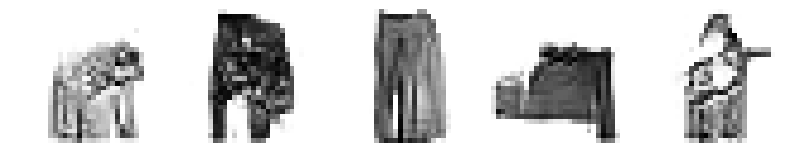

In [14]:
# Evaluate model performance visually
plt.figure(figsize=(10, 2))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(generated_imgs[i, :, :, 0], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 23ms/step


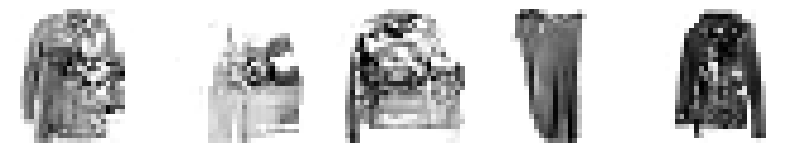

In [13]:
# Generate new samples
new_noise = np.random.normal(0, 1, size=(10, latent_dim))
new_generated_imgs = generator.predict(new_noise)

# Visualize the new samples
plt.figure(figsize=(10, 2))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.imshow(new_generated_imgs[i, :, :, 0], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.show()
